In [1]:
from fastai.vision.all import *
import gradio as gr
import torch as t

In [23]:
t.cuda.is_available()

True

In [11]:
path=Path('/home/raj/projects/pets_data/images')

In [12]:
path.ls()

(#7393) [Path('/home/raj/projects/pets_data/images/Birman_115.jpg'),Path('/home/raj/projects/pets_data/images/leonberger_142.jpg'),Path('/home/raj/projects/pets_data/images/Bombay_68.jpg'),Path('/home/raj/projects/pets_data/images/japanese_chin_26.jpg'),Path('/home/raj/projects/pets_data/images/saint_bernard_149.jpg'),Path('/home/raj/projects/pets_data/images/Ragdoll_41.jpg'),Path('/home/raj/projects/pets_data/images/japanese_chin_32.jpg'),Path('/home/raj/projects/pets_data/images/Ragdoll_68.jpg'),Path('/home/raj/projects/pets_data/images/Persian_202.jpg'),Path('/home/raj/projects/pets_data/images/scottish_terrier_143.jpg')...]

In [13]:
f=get_image_files(path)

In [14]:
f

(#7390) [Path('/home/raj/projects/pets_data/images/Birman_115.jpg'),Path('/home/raj/projects/pets_data/images/leonberger_142.jpg'),Path('/home/raj/projects/pets_data/images/Bombay_68.jpg'),Path('/home/raj/projects/pets_data/images/japanese_chin_26.jpg'),Path('/home/raj/projects/pets_data/images/saint_bernard_149.jpg'),Path('/home/raj/projects/pets_data/images/Ragdoll_41.jpg'),Path('/home/raj/projects/pets_data/images/japanese_chin_32.jpg'),Path('/home/raj/projects/pets_data/images/Ragdoll_68.jpg'),Path('/home/raj/projects/pets_data/images/Persian_202.jpg'),Path('/home/raj/projects/pets_data/images/scottish_terrier_143.jpg')...]

In [16]:
def is_cat(x): return x[0].isupper()
    

In [19]:
dls=ImageDataLoaders.from_name_func(   
    path = '.',
    fnames=f,
    label_func=is_cat,
    
    valid_pct=0.2,
    seed=None,
    item_tfms=Resize(192),
    batch_tfms=None,
)

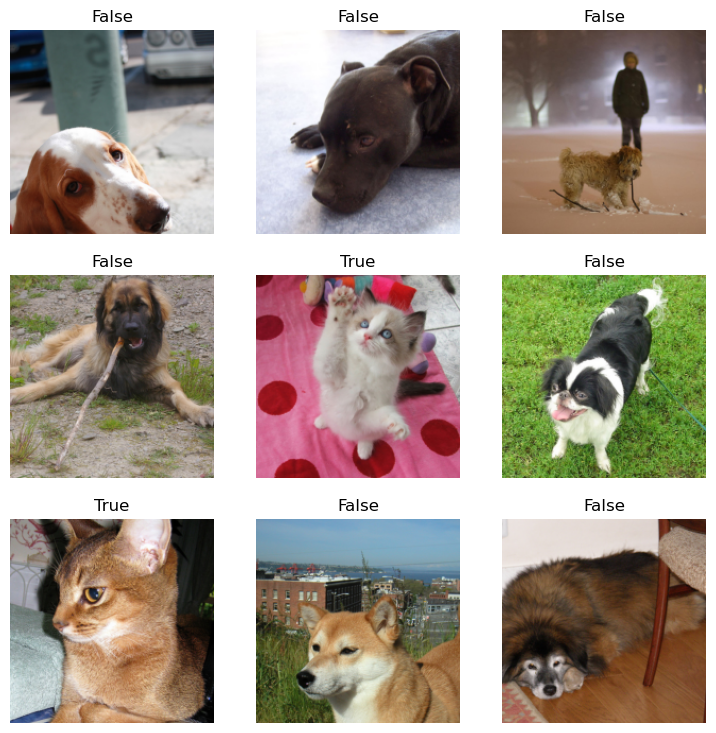

In [20]:
dls.show_batch()

In [21]:
learn=vision_learner(dls,resnet18, metrics=error_rate)

/home/raj/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/raj/mambaforge/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [24]:
learn.fine_tune(3)

In [25]:
learn.export('model.pkl')

In [26]:
l=load_learner('model.pkl')

In [31]:
PILImage.create('dog.jpg')

In [30]:
l.predict(img)

NameError: name 'img' is not defined

In [27]:
cat=('cat','dog')
def classify(img):
    s,i,p=l.predict(img)
    return dict(zip(cat,map(float,p)))

In [29]:
image=gr.inputs.Image(shape=(192,192))
label=gr.outputs.Label()
inf=gr.Interface(fn=classify,inputs=image,outputs=label,)
inf.launch(inline=False)

/home/raj/mambaforge/lib/python3.10/site-packages/gradio/inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/home/raj/mambaforge/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/home/raj/mambaforge/lib/python3.10/site-packages/gradio/outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/home/raj/mambaforge/lib/python3.10/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x7f84f4ed11b0>, 'http://127.0.0.1:7860/', None)